<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Julia María Domínguez Russell y Mariana Valenzuela Lafarga.

**Fecha:** 30 de marzo del 2021.

**Expediente** : 749767 & 749770.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/JuliaDomRuss/Proyecto_Simulacion

# Proyecto TEMA-2

## Definición del proyecto

Para este proyecto se va a modelar un tipo de cambio, el cuál es el **dólar (USD/MXN)**.Para poder modelar obtuvimos los datos mensuales del tipo de cambio de la divisa mencionada desde el mes de abril del 2015 hasta el mes de marzo del 2023. Para poder realizar la simulación se utilizarán 4 diferentes nodos los cuáles son el diferencial de inflación, diferencial de crecimiento económico, información histórica del mismo tipo de cambio y tasas de interés entre ambos países.

A continuación, se muestra el diagrama para realizar nuestro modelo donde se identifican los “nodos” o “escenarios” a simular.

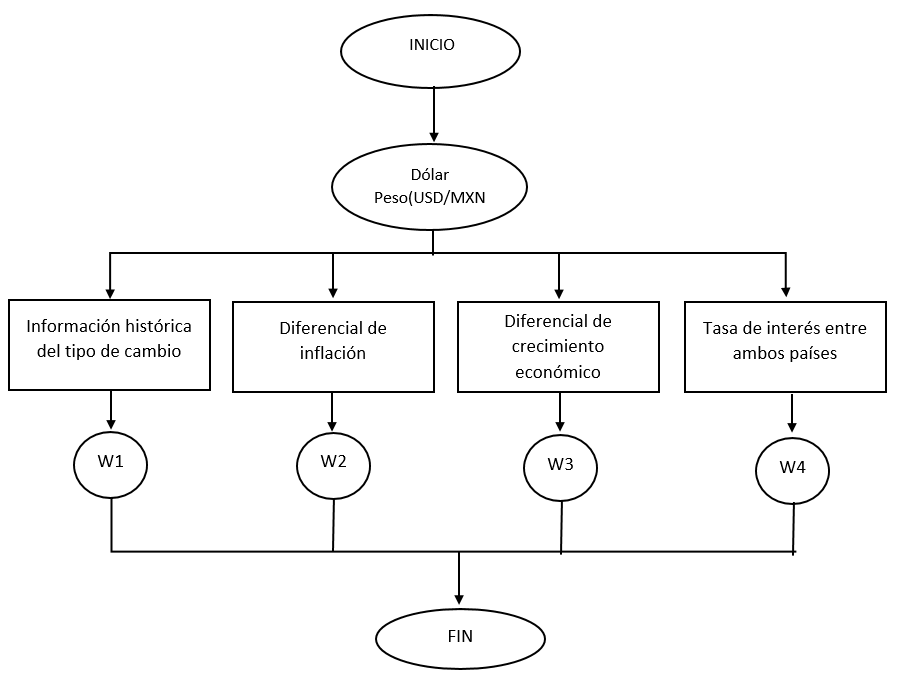

Las variables que tomamos en cuenta en este proyecto son los que creemos que pueden tener un impacto y a su vez guardan una relación con el tipo de cambio. 

Los nodos que tomamos en cuenta en este proyecto son los que creemos que pueden tener un impacto y a su vez guardan una relación con el tipo de cambio. 
- La información histórica del mismo tipo de cambio este es un determinante  importante para el tipo de cambio. Es decir, el valor de la moneda local futura, depende de su valor anterior o sus valores históricos. Haciendolo así un modelo con una parte autoregresiva.
- El diferencial de inflación se refiere a la diferencia que existe entre la tasa de inflación de dos o más países, se va a utilizar como “nodo” ya que suele utilizarse como indicador de la posición competitiva y de la variación relativa de los tipos de cambio a largo plazo.
- El diferencial de crecimiento económico hace referencia a la diferencia que existe entre la tasa de crecimiento económico entre dos o más países, se va a utilizar como "nodo" ya que hay una relación en el largo plazo entre el aumento o dismunición del PIB con el tipo de cambio, por ejemplo un crecimiento del producto interno bruto aprecia la moneda de ese país, es decir, el incremento de la productividad de un país en relación con otros hace que su moneda se aprecie.
- La tasa de interés entre ambos países nos habla acerca de la tasa de interés interna que maneja cada país en el que se ve involucrado el tipo de cambio y hay una relación a corto plazo entre tipo de cambio y tasa de interés por ejemplo si la tasa de interés interna sube y se mantiene constante el tipo de cambio, el rendimiento de los activos locales se eleva en relación con los extranjeros por lo que los inversionistas los demandarán más, ocasionando que la moneda local se aprecie y vicervesa.

## Objetivos

### Objetivo general: 
- Predecir si el tipo de cambio aumentará el próximo mes.

### Objetivos específicos:
- Encontrar la distribución de probabilidad del tipo de cambio USD/MXN.
- Encontrar la distribución de probabilidad del diferencial de inflación.
- Encontrar la distribución de probabilidad del diferencial de crecimiento económico.
- Encontrar la distribución de probabilidad de la tasa de interés entre ambos países.
- Realizar una prueba de hipótesis de la independencia de los nodos.
- Encontrar los pesos de cada nodo para predecir el tipo de cambio USD/MXN.
- Encontrar la ecuación por la cual se rige el tipo de cambio USD/MXN.

## Hipótesis y supuestos

En nuestro modelo tenemos el siguiente supuesto:
- Asumimos que el tipo de cambio entre USD/MXN puede predecirse con estos nodos.

La hipótesis que queremos demostrar es la siguiente:
- Las variables utilizadas para predecir los nodos son independientes estadísticamente.

## Obtención de Base de Datos

**Datos históricos de la tasa de cambio**

La tasa de cambio USD/MXN se obtuvo con frecuencia mensual desde abril 2015 a marzo 2023. Los datos fueron recopilados de investing el 15 de abril del 2023 en https://mx.investing.com/currencies/usd-mxn.

**Diferencial de inflación**

Se utilizó la tasa de inflación interanual de México y Estados Unidos de América de frecuencia mensual desde abril 2015 a marzo 2023.Los datos fueron recopilados de Datos Macro de las siguientes ligas: https://datosmacro.expansion.com/ipc-paises/mexico?sector=IPC+General&sc=IPC-IG y https://datosmacro.expansion.com/ipc-paises/usa?sector=IPC+General&sc=IPC-IG.

## Visualización de resultados de simulación

## Código de la simulación

### Prueba de correlación

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from matplotlib import pyplot as plt

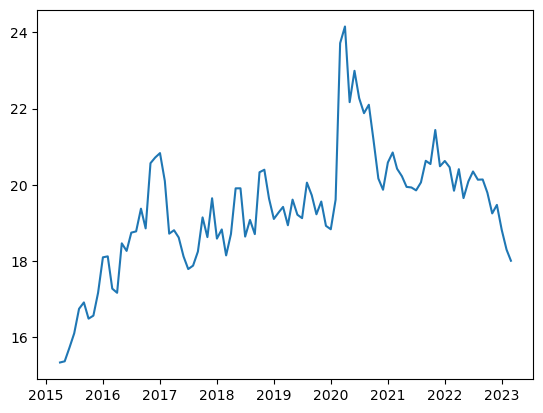

In [2]:
tc_dolar = pd.read_excel(
    "Tipo de cambio.xlsx",
    sheet_name="Hoja1",
    index_col=[0],
    usecols=[0, 1]
)
x= tc_dolar.values
x= x.ravel()
plt.plot(tc_dolar)

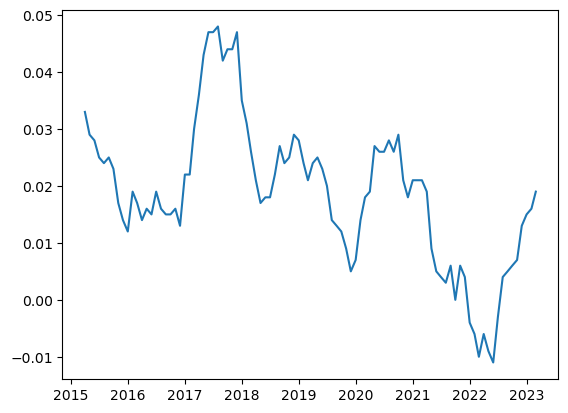

In [3]:
dif_inf = pd.read_excel(
    "Inflacion Mexico.xlsx",
    sheet_name="Hoja2",
    index_col=[0],
    usecols=[0, 1]
)
y= dif_inf.values
y= y.ravel()
plt.plot(dif_inf)

In [4]:
pearsonr(x, y)

PearsonRResult(statistic=-0.2612941302689739, pvalue=0.010127347329697684)

In [5]:
np.corrcoef(x, y)

array([[ 1.        , -0.26129413],
       [-0.26129413,  1.        ]])

## Prueba de independencia

In [6]:
from scipy.stats import chi2_contingency

**Entre información histórica del tipo de cambio y el diferencial de inflación**

In [7]:
tabla = pd.crosstab(x, y)

# Realizamos el test de chi-cuadrado
stat, p, dof, expected = chi2_contingency(tabla)

# Mostramos los resultados
print("Estadístico de chi-cuadrado: ", stat)
print("Valor p: ", p)
print("Grados de libertad: ", dof)
print("Frecuencias esperadas: ", expected)

Estadístico de chi-cuadrado:  6240.000000000001
Valor p:  0.12024099077645083
Grados de libertad:  6110
Frecuencias esperadas:  [[0.01041667 0.01041667 0.01041667 ... 0.01041667 0.03125    0.01041667]
 [0.01041667 0.01041667 0.01041667 ... 0.01041667 0.03125    0.01041667]
 [0.01041667 0.01041667 0.01041667 ... 0.01041667 0.03125    0.01041667]
 ...
 [0.01041667 0.01041667 0.01041667 ... 0.01041667 0.03125    0.01041667]
 [0.01041667 0.01041667 0.01041667 ... 0.01041667 0.03125    0.01041667]
 [0.01041667 0.01041667 0.01041667 ... 0.01041667 0.03125    0.01041667]]


# Simulaciones de nodos

In [8]:
from sklearn.neighbors import KernelDensity
import seaborn as sns
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import random

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x2 = f(R1)
    t_x2 = t(R1)
    condition = R2*t_x2 <=f_x2
    [plt.plot(R1[i],R2[i]*t_x2[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x2[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    return x

def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
                
    return x

def kde_statsmodels_m2(x, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return lambda x_i: kde.pdf(x_i)




kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)

Package Versions:
  scikit-learn: 1.2.2
  scipy: 1.9.1
  statsmodels: 0.13.2


In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Nodo 1: Simulación de información histórica del tipo de cambio

## Kernel Density Estimation

In [10]:
# El grid que usaremos para graficar
x_grid = np.linspace(10, 30, 1000)


### Histograma

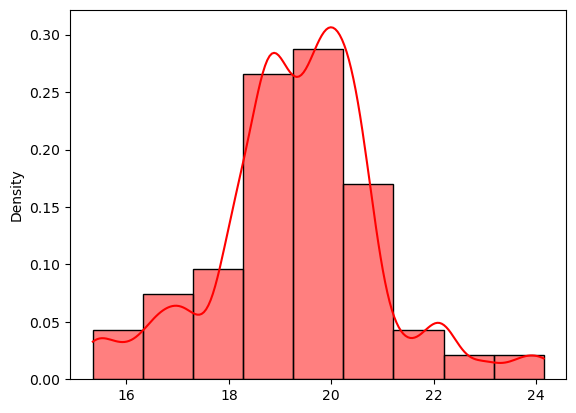

In [11]:
sns.histplot(data=x, stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=9);

<AxesSubplot:ylabel='Density'>

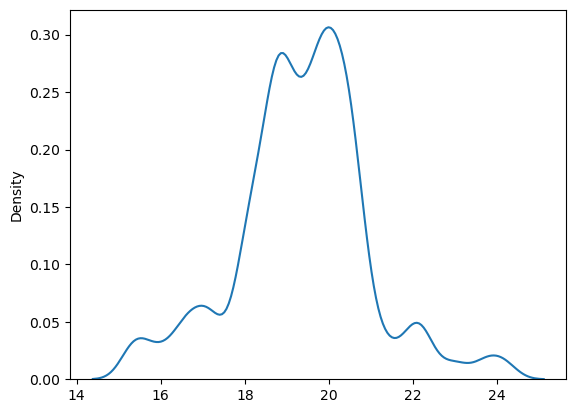

In [12]:
sns.kdeplot(data=x, bw_method=0.2)

### Selección de ancho de banda

La selección del ancho debanda es muy importante del KDE. Para los mismos datos, diferentes anchos de banda pueden producir diferentes resultados. 

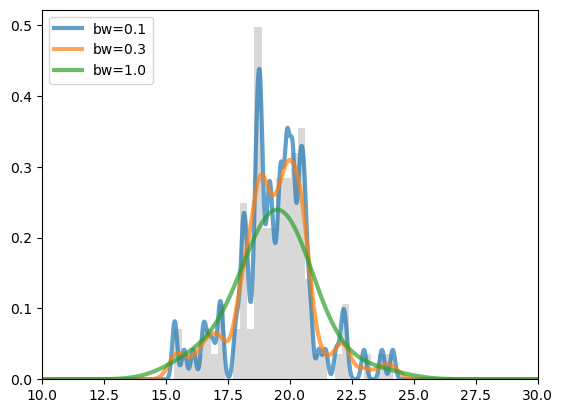

In [13]:
fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(10, 30)
ax.legend(loc='upper left')

### Validación cruzada de ancho de banda en Scikit-Learn

In [14]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 1.0}


In [15]:
f = lambda x: grid.score_samples(x[:, None])
f(np.array([1]))

array([-107.84959624])

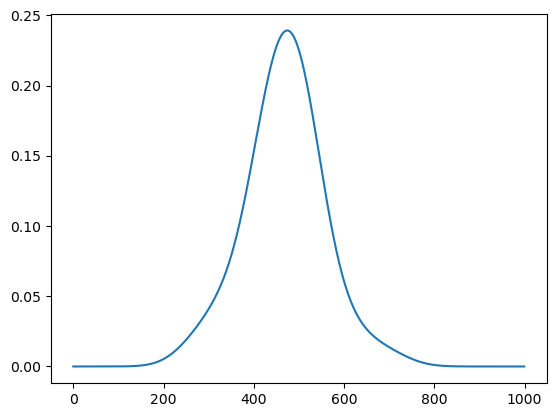

In [16]:
plt.plot(np.exp(grid.score_samples(x_grid[:, None])))

Text(0.5, 1.0, 'KDE using scikit-learn')

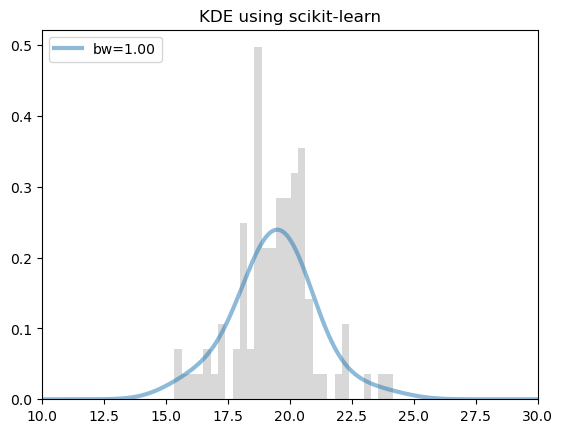

In [17]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(10, 30);
ax.set_title('KDE using scikit-learn')

### Validación cruzada de ancho de banda in Stats-models

#### Función de densidad de probabilidad

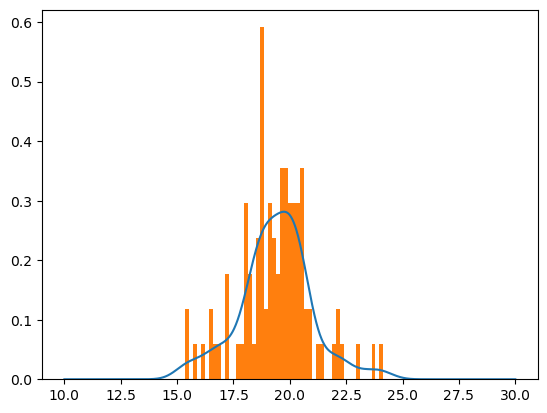

In [18]:
pdf = kde_statsmodels_m2(x)
plt.plot(x_grid, pdf(x_grid));
plt.hist(x, bins=50, density=True);

#### Función de distribución acumulada CDF

In [19]:
cdf= np.cumsum(pdf(x_grid))

Text(0.5, 1.0, 'Función de distribución acumulada CDF')

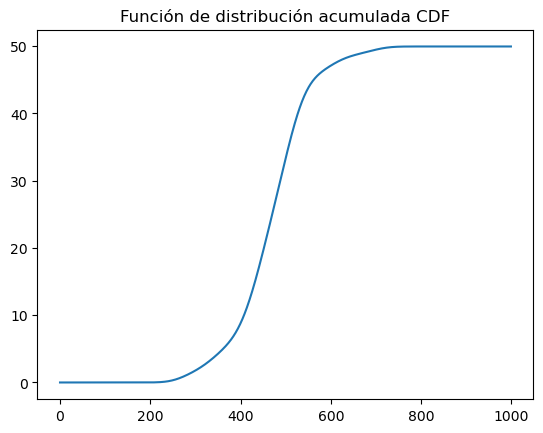

In [20]:
plt.plot(cdf)
plt.title("Función de distribución acumulada CDF")

### Método de Acpetación-Rechazo

In [21]:
def m_estratificado(a, b, B):
    Ui = np.random.uniform(a, b, B)
    Bi = np.arange(0, B)
    Ui_estra = (Ui + Bi) / B
    
    # Escalar a un rango entre a y b
    min_val = Ui_estra.min()
    max_val = Ui_estra.max()
    Ui_estra = ((Ui_estra - min_val) / (max_val - min_val)) * (b - a) + a
    
    return Ui_estra

In [22]:
N = 1000
a=10
b=30
B=N

Bi = np.arange(0, B)
Ui = np.random.uniform(a, b, B)
Ui_estrat = (Ui + Bi) / B

m_estratificado(a, b, B)

array([10.08153034, 10.24678375, 10.21194867, 10.        , 10.03572662,
       10.1129544 , 10.25135312, 10.15000018, 10.42963798, 10.33728919,
       10.18248608, 10.40329353, 10.2929876 , 10.28218214, 10.21652643,
       10.46647989, 10.41136383, 10.55198574, 10.57451016, 10.46677861,
       10.51690418, 10.7042643 , 10.73167132, 10.69820198, 10.57911205,
       10.6684106 , 10.49002647, 10.54919792, 10.48233303, 10.83082691,
       10.65496577, 10.61768391, 10.6571473 , 10.69757638, 10.82251714,
       10.69415142, 11.00456149, 10.69377993, 10.69287575, 11.0791733 ,
       10.95093652, 11.05577472, 10.92063323, 10.89672508, 11.04458646,
       11.00580745, 10.97454007, 10.97918228, 11.25323049, 11.02956804,
       10.923458  , 11.29750125, 11.16544987, 11.15073551, 11.20970262,
       11.1112257 , 11.28980298, 11.13813203, 11.42361689, 11.24701113,
       11.42693562, 11.33890722, 11.18671711, 11.4445754 , 11.19976429,
       11.24367907, 11.42604399, 11.35470748, 11.30689463, 11.52

In [23]:
n=int(N/2)
r = np.random.uniform(a,b,n)
rc = b - r + a
np.concatenate((r, rc))

array([19.80260247, 16.45348169, 27.82823629, 13.27069348, 18.91523807,
       16.61237286, 15.5453712 , 16.4897347 , 15.48864443, 14.35309074,
       14.82708253, 17.70073607, 19.53702218, 27.00791697, 17.96036708,
       17.75724294, 20.32426854, 27.97205034, 15.07553292, 12.60581699,
       19.61125695, 11.95318935, 24.11305535, 13.67267348, 18.55902506,
       20.98110237, 20.91342501, 21.16693808, 11.51243886, 24.42137961,
       28.79458925, 26.8662133 , 12.13580859, 23.26068319, 11.14752222,
       29.93576526, 16.05246568, 18.08350526, 20.37069948, 18.84992325,
       22.54145359, 19.07287198, 13.56141671, 14.83010061, 20.07670259,
       24.73174601, 21.68770663, 29.79015061, 10.78428551, 20.90219221,
       26.34068787, 15.86757649, 29.1671018 , 29.06626252, 10.10663817,
       14.74734655, 12.20837981, 25.14665258, 20.86023542, 18.02258365,
       28.77214192, 19.44748256, 28.03695025, 11.07017794, 20.43957543,
       12.72451164, 22.70483628, 24.37673002, 12.19293621, 17.75

In [24]:
x= tc_dolar.values
x= x.ravel()

In [25]:
from scipy import optimize
f = pdf
a=f(optimize.fmin(lambda x:-f(x), 0, disp=False))
t =lambda x: a * np.ones(len(x))
x = np.arange(10, 30, 0.01)
print('El máximo de f es:',a)

El máximo de f es: 0.2815046963074191


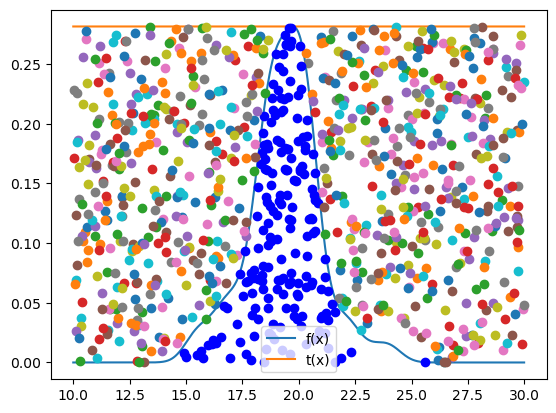

array([10.  , 10.01, 10.02, ..., 29.97, 29.98, 29.99])

In [26]:
R2 = np.random.rand(N)
R1 = np.random.uniform(10, 30, 1000)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

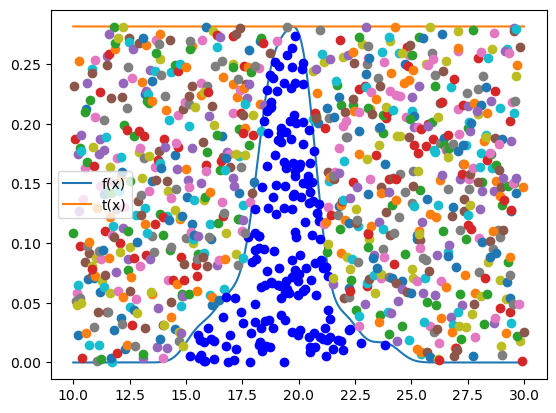

array([10.  , 10.01, 10.02, ..., 29.97, 29.98, 29.99])

In [27]:
N = 1000
R2 = np.random.rand(N)
R1_est = m_estratificado(10, 30, N)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1_est, f, t)

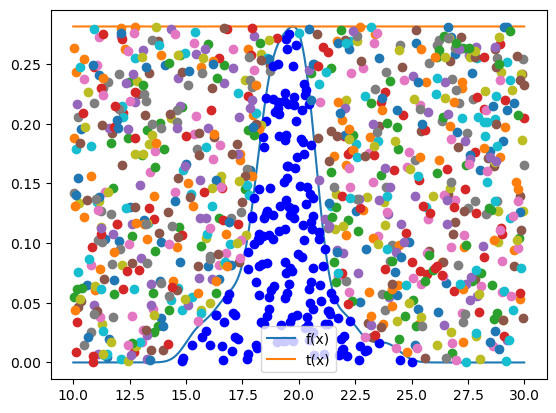

array([10.  , 10.01, 10.02, ..., 29.97, 29.98, 29.99])

In [28]:
N = 1000
R2 = np.random.rand(N)
R1_com = np.concatenate((r, rc))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1_com, f, t)

In [29]:
acep= len(Acep_rechazo3(R2, R1, f, t))
acep_est=len(Acep_rechazo3(R2, R1_est, f, t))
acep_com= len(Acep_rechazo3(R2, R1_com, f, t))
acep, acep_est, acep_com

(192, 180, 168)

In [30]:
tc = np.array(Acep_rechazo3(R2, R1, f, t))
n1 = (tc < 18.5).sum()
n3= (tc > 20.5).sum()
n2 =len(tc) - n1 - n3
nt= len(tc)

In [31]:
xi = lambda u: -np.log(u)


r1 = np.random.uniform(10, 18.5, n1)
r2 = np.random.uniform(18.5, 20.5, n2)
r3 = np.random.uniform(20.5, 30, n3)

# r = np.concatenate[r1, r2, r3]



## Comprobación de distribuciones

In [32]:
import scipy.stats as st     # Librería estadística
import statsmodels.api as sm 
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [33]:
tc_dolar = pd.read_excel(
    "Tipo de cambio.xlsx",
    sheet_name="Hoja1",
    index_col=[0],
    usecols=[0, 1]
)
x= tc_dolar.values
data= x.ravel()
data.shape

(96,)

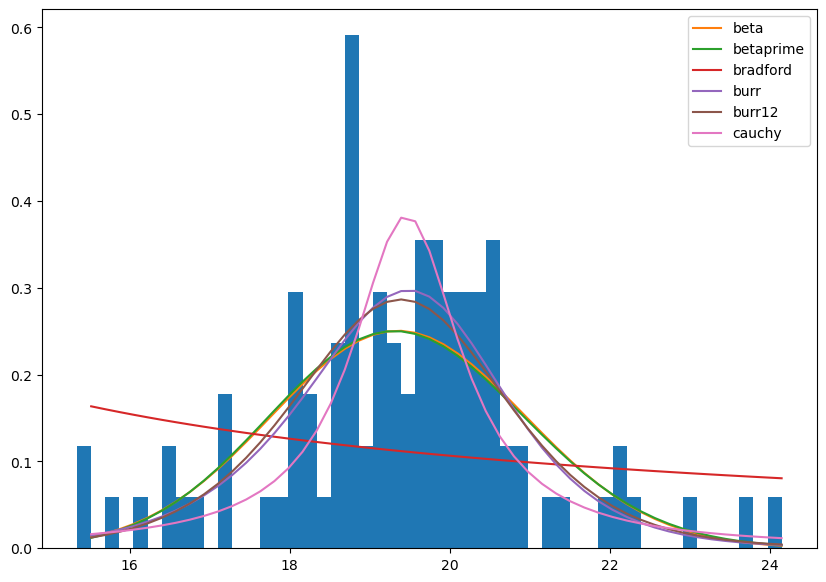

,distribución,error
0,beta,0.008163
1,betaprime,0.00824
2,bradford,0.017606
3,burr,0.007158
4,burr12,0.007409
5,cauchy,0.008548


In [34]:
#todas las distribuciones continuas
continuous_dist= [dist_i  for dist_i in dir(st) 
                  if isinstance(getattr(st,dist_i), getattr(st, 'rv_continuous'))]

fig, ax= plt.subplots(1,1, figsize=(10,7))

y,x, _= ax.hist(data, bins=50, density=True)
x= x[1:]

error_df= pd.DataFrame(columns= ['distribución', 'error'])
i= 0

#iteramos sobre todas y vemos cual se ajusta a los datos
for d in continuous_dist[4:10]:
    param= getattr(st, d).fit(data)
    y_hat= getattr(st,d).pdf(x, *param)
    error= np.mean((y-y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i += 1
    ax.plot(x, y_hat, label=f'{d}')

plt.legend()
plt.show()
error_df

In [35]:
error_df.sort_values('error')

,distribución,error
3,burr,0.007158
4,burr12,0.007409
0,beta,0.008163
1,betaprime,0.00824
5,cauchy,0.008548
2,bradford,0.017606


## Quantil- Quantil
Mejores tres con quantil-quantil

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


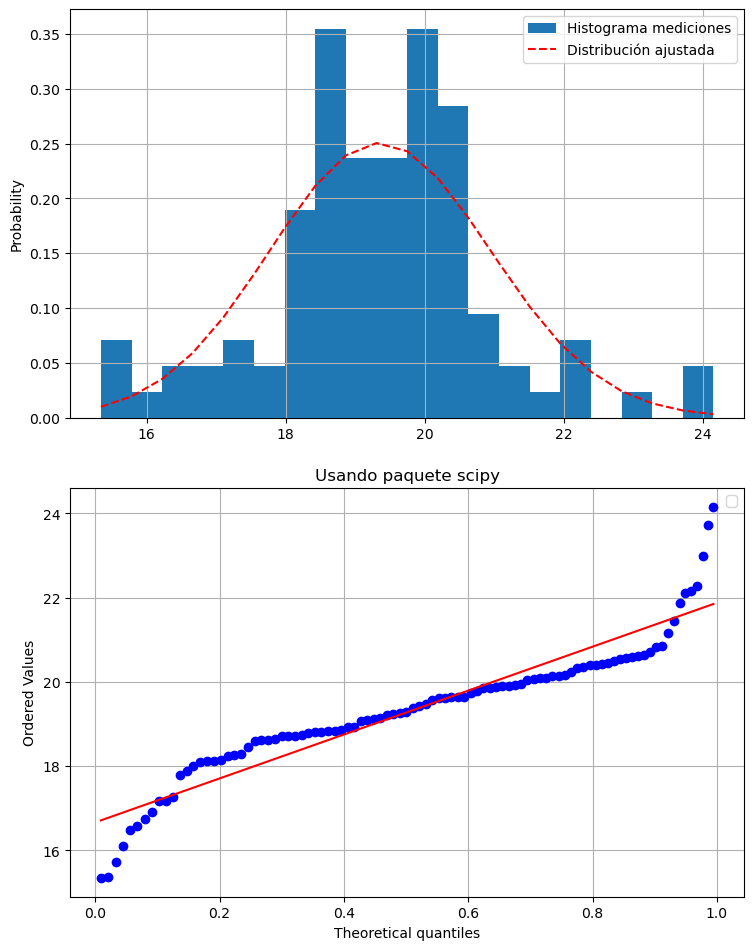

In [36]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'beta'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


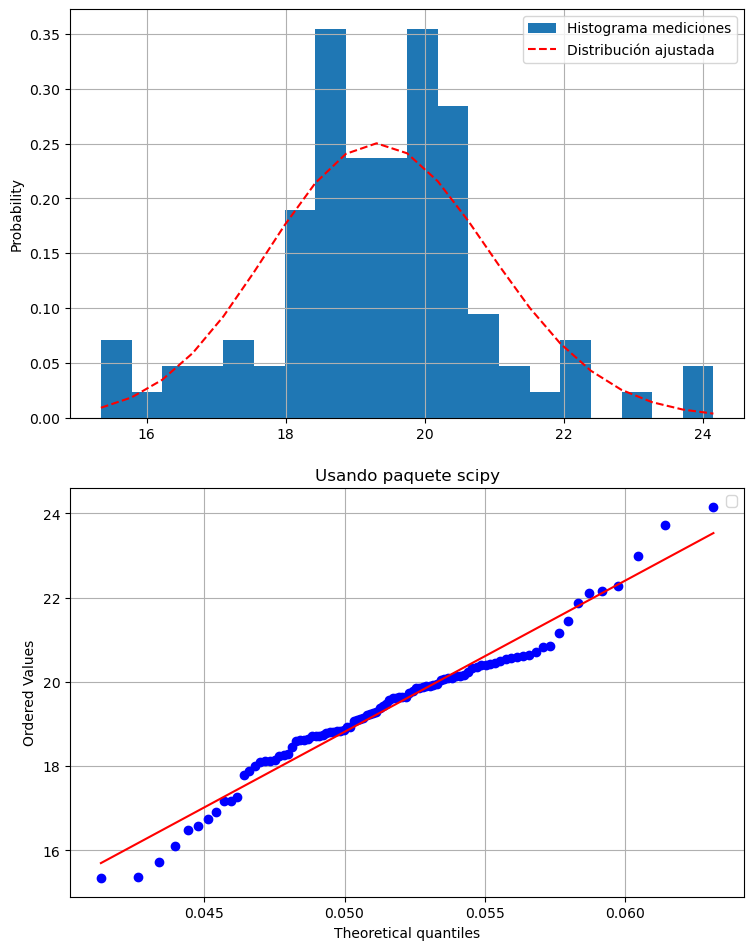

In [37]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'betaprime'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


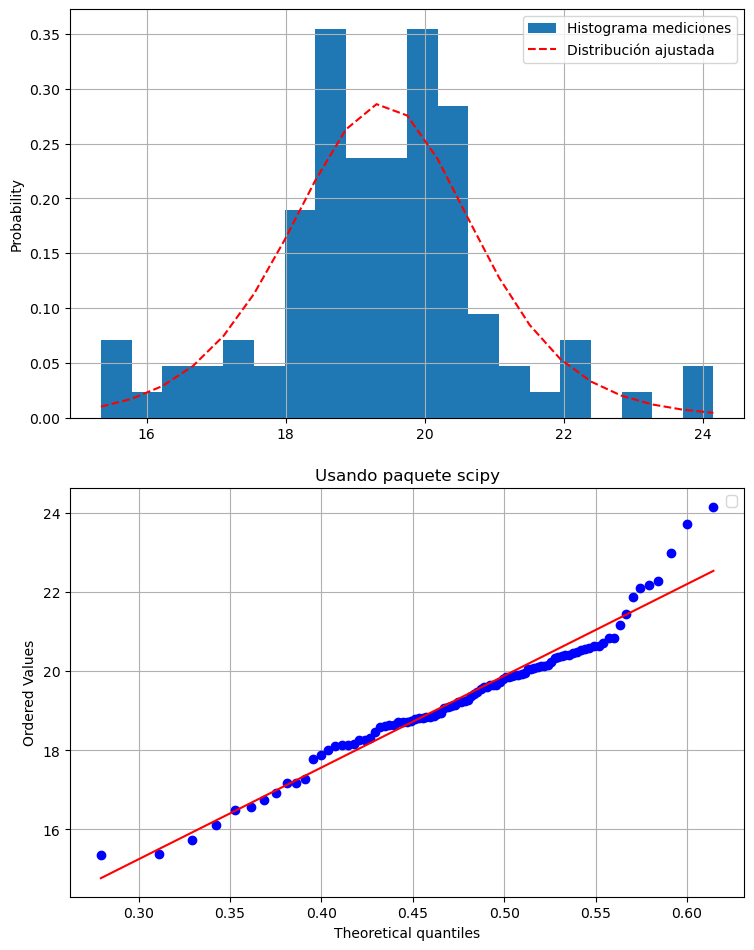

In [38]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'burr12'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

## Nodo 2: Simulación del diferencial de inflación

## Kernel Density Estimation

In [39]:
dif_inf = pd.read_excel(
    "Inflacion Mexico.xlsx",
    sheet_name="Hoja2",
    index_col=[0],
    usecols=[0, 1]
)
y= dif_inf.values
y= y.ravel()
#Datos
dif_inf

,Diferencial
Fecha,
2015-04-01,0.033
2015-05-01,0.029
2015-06-01,0.028
2015-07-01,0.025
2015-08-01,0.024
...,...
2022-11-01,0.007
2022-12-01,0.013
2023-01-01,0.015


In [40]:
y= dif_inf.values
y= y.ravel()
y.shape
y_grid = np.linspace(-0.02, 0.05, 1000)

### Histograma

<AxesSubplot:ylabel='Density'>

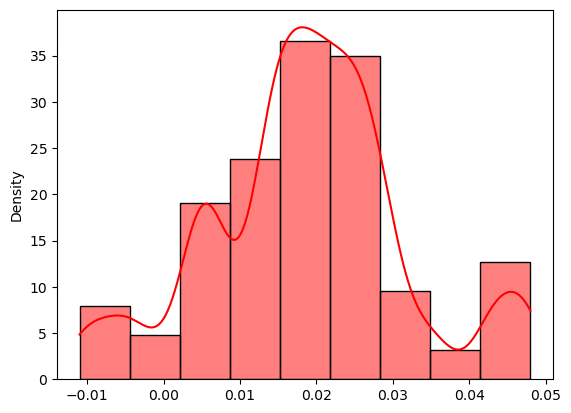

In [41]:
sns.histplot(data=y, stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=9)

<AxesSubplot:ylabel='Density'>

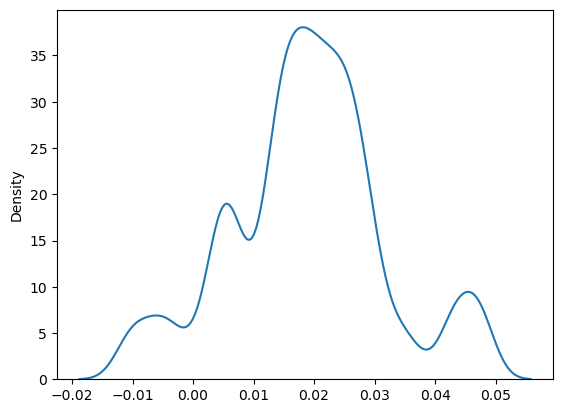

In [42]:
sns.kdeplot(data=y, bw_method=0.2)

### Selección de ancho de banda

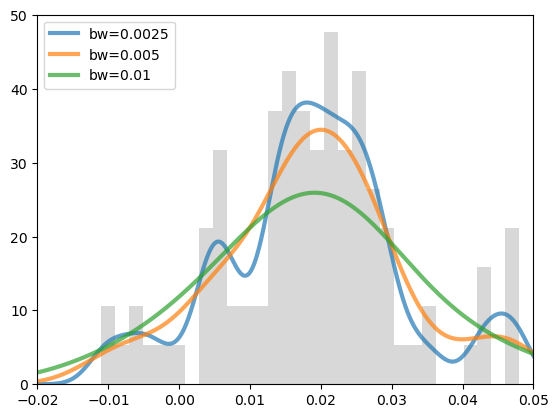

In [43]:
fig, ax = plt.subplots()
for bandwidth in [0.0025, 0.005, .01]:
    ax.plot(y_grid, kde_sklearn(y, y_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(y, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(-0.02, .05)
ax.legend(loc='upper left')

### Validación cruzada de ancho de banda en Scikit-Learn

In [44]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.005, 0.002, 1)},
                    cv=20) # 20-fold cross-validation
grid.fit(y[:, None])
print(grid.best_params_)

{'bandwidth': 0.005}


In [45]:
f = lambda y: grid.score_samples(y[:, None])
f(np.array([1]))

array([-18126.26496936])

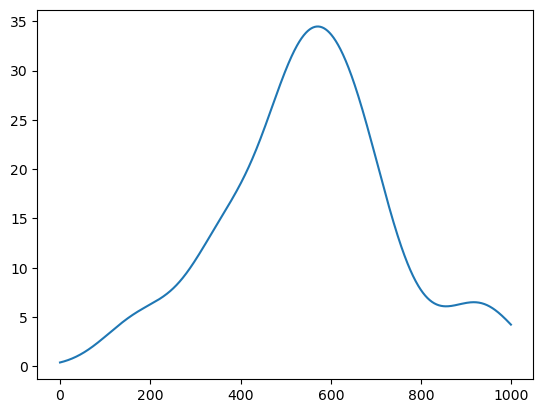

In [46]:
plt.plot(np.exp(grid.score_samples(y_grid[:, None])))

Text(0.5, 1.0, 'KDE using scikit-learn')

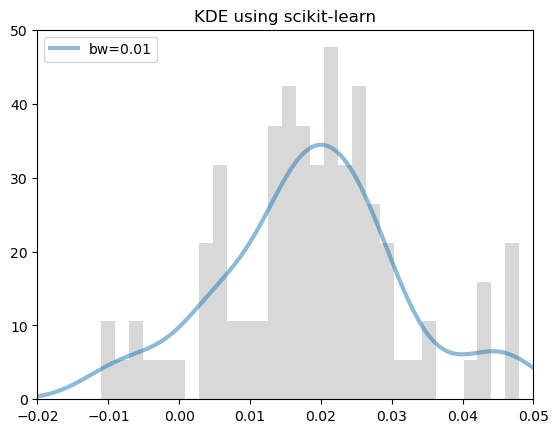

In [47]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(y_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(y_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(y, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(-.02, 0.05, 30);
ax.set_title('KDE using scikit-learn')

### Validación cruzada de ancho de banda in Stats-models

#### Función de densidad de probabilidad

(array([17.65536723,  8.82768362,  0.        ,  0.        , 17.65536723,
         8.82768362,  8.82768362,  0.        ,  0.        ,  8.82768362,
         0.        ,  8.82768362, 26.48305085, 26.48305085, 26.48305085,
        17.65536723, 17.65536723,  0.        ,  0.        , 17.65536723,
        26.48305085, 35.31073446, 70.62146893, 26.48305085, 35.31073446,
        44.13841808,  8.82768362, 79.44915254, 17.65536723, 35.31073446,
        35.31073446, 35.31073446, 17.65536723, 52.96610169,  8.82768362,
         8.82768362,  0.        ,  8.82768362,  8.82768362,  8.82768362,
         0.        ,  0.        ,  0.        ,  0.        ,  8.82768362,
         8.82768362, 17.65536723,  0.        ,  0.        , 35.31073446]),
 array([-0.011  , -0.00982, -0.00864, -0.00746, -0.00628, -0.0051 ,
        -0.00392, -0.00274, -0.00156, -0.00038,  0.0008 ,  0.00198,
         0.00316,  0.00434,  0.00552,  0.0067 ,  0.00788,  0.00906,
         0.01024,  0.01142,  0.0126 ,  0.01378,  0.01496,  0.016

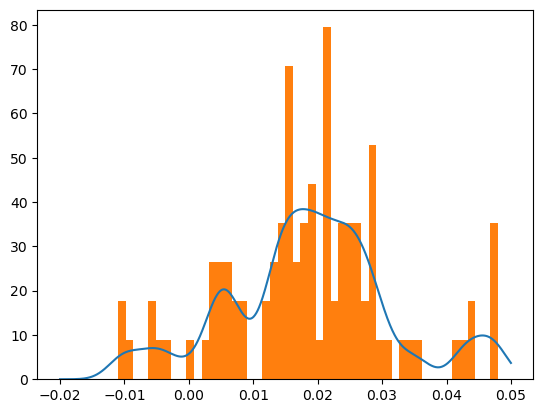

In [48]:
kde_statsmodels_m2(y)
pdf_y = kde_statsmodels_m2(y)
plt.plot(y_grid, pdf_y(y_grid))
plt.hist(y, bins=50, density=True)

#### Función de distribución acumulada CDF

In [49]:
cdf_y= np.cumsum(pdf_y(y_grid))

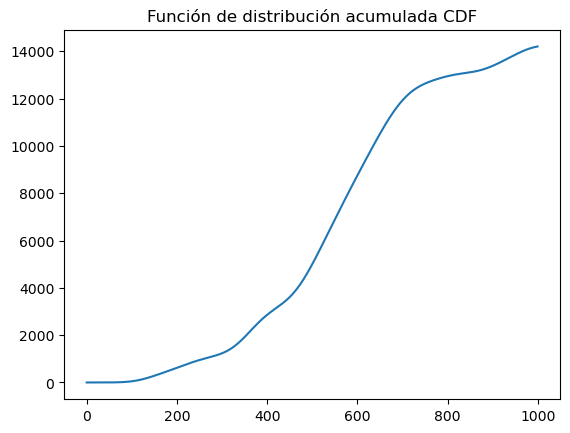

In [50]:
plt.plot(cdf_y);
plt.title("Función de distribución acumulada CDF");

## Método Aceptación Rechazo

In [52]:
def m_estratificado(a, b, B):
    Ui = np.random.uniform(a, b, B)
    Bi = np.arange(0, B)
    Ui_estra = (Ui + Bi) / B
    
    # Escalar a un rango entre a y b
    min_val = Ui_estra.min()
    max_val = Ui_estra.max()
    Ui_estra = ((Ui_estra - min_val) / (max_val - min_val)) * (b - a) + a
    
    return Ui_estra

In [53]:
N = 1000
a=-.02
b=.05
B=N

Bi = np.arange(0, B)
Ui = np.random.uniform(a, b, B)
Ui_estrat = (Ui + Bi) / B

m_estratificado(a, b, B)

array([-2.00000000e-02, -1.99292388e-02, -1.98603867e-02, -1.97874877e-02,
       -1.97161279e-02, -1.96491129e-02, -1.95758042e-02, -1.95099060e-02,
       -1.94393507e-02, -1.93691258e-02, -1.92964698e-02, -1.92282283e-02,
       -1.91583035e-02, -1.90880383e-02, -1.90150413e-02, -1.89482235e-02,
       -1.88749711e-02, -1.88073459e-02, -1.87393746e-02, -1.86674914e-02,
       -1.85957894e-02, -1.85263356e-02, -1.84556190e-02, -1.83867228e-02,
       -1.83148618e-02, -1.82449602e-02, -1.81745931e-02, -1.81085822e-02,
       -1.80377282e-02, -1.79670402e-02, -1.78943722e-02, -1.78264226e-02,
       -1.77536265e-02, -1.76862606e-02, -1.76142159e-02, -1.75473272e-02,
       -1.74769858e-02, -1.74069100e-02, -1.73339444e-02, -1.72672182e-02,
       -1.71974662e-02, -1.71248804e-02, -1.70561659e-02, -1.69849145e-02,
       -1.69161373e-02, -1.68474898e-02, -1.67746715e-02, -1.67067132e-02,
       -1.66329139e-02, -1.65672495e-02, -1.64955754e-02, -1.64241388e-02,
       -1.63555096e-02, -

In [54]:
n=int(N/2)
r = np.random.uniform(a,b,n)
rc = b - r + a
np.concatenate((r, rc))

array([ 1.85700055e-02,  4.15415377e-02,  1.82645906e-02,  2.36070787e-02,
        1.01581446e-03,  4.12714980e-02,  1.69963703e-02,  4.10688991e-02,
        3.41504995e-02,  4.12402787e-02, -1.66724979e-02,  3.93598938e-02,
        2.20133314e-02, -1.51198837e-02,  2.44450132e-02,  4.01388268e-02,
        4.96699103e-02, -4.78890804e-03, -6.45650409e-03, -8.11655071e-03,
        4.77564894e-02,  4.67435827e-02,  5.23122330e-03, -1.79692420e-02,
        3.68334149e-02,  3.52529855e-02,  1.90239167e-02,  4.12227114e-02,
        2.00631387e-02,  4.23484891e-02,  5.69240571e-03,  7.74008597e-03,
       -4.59856851e-03,  1.19821886e-02,  2.31287328e-02,  3.30484270e-02,
        2.78846921e-03,  1.56682097e-02,  1.06787199e-02, -1.30836713e-02,
       -1.94468193e-02,  2.45220167e-02, -1.49168475e-02,  3.44109383e-02,
       -1.42201179e-02,  3.15540953e-02, -5.88190078e-04,  1.05223766e-02,
       -6.10870814e-03,  4.72941151e-02,  1.93976138e-02, -1.72183355e-02,
       -1.71347641e-02,  

In [60]:
y= dif_inf.values
y= y.ravel()

In [61]:
from scipy import optimize
f = pdf_y
# a=f(optimize.fmin(lambda y:-f(y), 0, disp=False))
a=39
t =lambda y: a * np.ones(len(y))
x = np.arange(-.02, .05, 0.0001)
print('El máximo de f es:',a)

El máximo de f es: 39


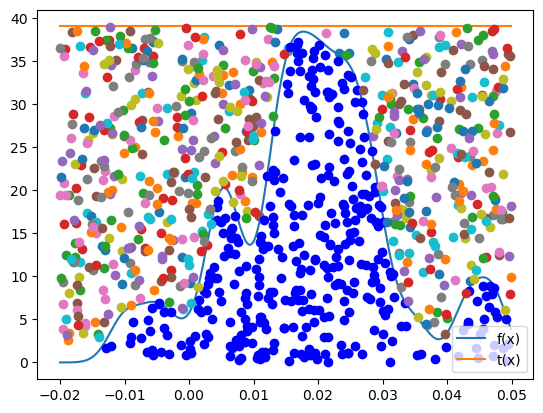

array([-2.00000000e-02, -1.99000000e-02, -1.98000000e-02, -1.97000000e-02,
       -1.96000000e-02, -1.95000000e-02, -1.94000000e-02, -1.93000000e-02,
       -1.92000000e-02, -1.91000000e-02, -1.90000000e-02, -1.89000000e-02,
       -1.88000000e-02, -1.87000000e-02, -1.86000000e-02, -1.85000000e-02,
       -1.84000000e-02, -1.83000000e-02, -1.82000000e-02, -1.81000000e-02,
       -1.80000000e-02, -1.79000000e-02, -1.78000000e-02, -1.77000000e-02,
       -1.76000000e-02, -1.75000000e-02, -1.74000000e-02, -1.73000000e-02,
       -1.72000000e-02, -1.71000000e-02, -1.70000000e-02, -1.69000000e-02,
       -1.68000000e-02, -1.67000000e-02, -1.66000000e-02, -1.65000000e-02,
       -1.64000000e-02, -1.63000000e-02, -1.62000000e-02, -1.61000000e-02,
       -1.60000000e-02, -1.59000000e-02, -1.58000000e-02, -1.57000000e-02,
       -1.56000000e-02, -1.55000000e-02, -1.54000000e-02, -1.53000000e-02,
       -1.52000000e-02, -1.51000000e-02, -1.50000000e-02, -1.49000000e-02,
       -1.48000000e-02, -

In [62]:
N = 1000
R2 = np.random.rand(N)
R1 = [random.uniform(-.02, .05) for i in range(N)]
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

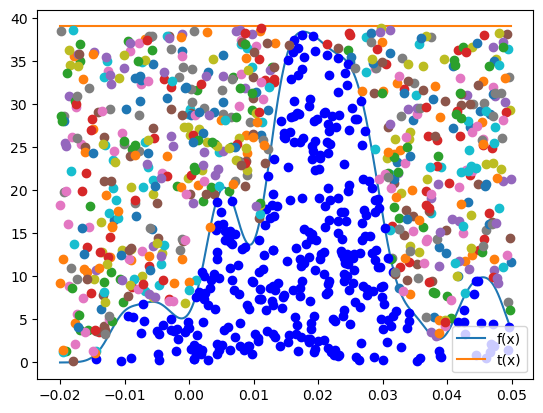

array([-2.00000000e-02, -1.99000000e-02, -1.98000000e-02, -1.97000000e-02,
       -1.96000000e-02, -1.95000000e-02, -1.94000000e-02, -1.93000000e-02,
       -1.92000000e-02, -1.91000000e-02, -1.90000000e-02, -1.89000000e-02,
       -1.88000000e-02, -1.87000000e-02, -1.86000000e-02, -1.85000000e-02,
       -1.84000000e-02, -1.83000000e-02, -1.82000000e-02, -1.81000000e-02,
       -1.80000000e-02, -1.79000000e-02, -1.78000000e-02, -1.77000000e-02,
       -1.76000000e-02, -1.75000000e-02, -1.74000000e-02, -1.73000000e-02,
       -1.72000000e-02, -1.71000000e-02, -1.70000000e-02, -1.69000000e-02,
       -1.68000000e-02, -1.67000000e-02, -1.66000000e-02, -1.65000000e-02,
       -1.64000000e-02, -1.63000000e-02, -1.62000000e-02, -1.61000000e-02,
       -1.60000000e-02, -1.59000000e-02, -1.58000000e-02, -1.57000000e-02,
       -1.56000000e-02, -1.55000000e-02, -1.54000000e-02, -1.53000000e-02,
       -1.52000000e-02, -1.51000000e-02, -1.50000000e-02, -1.49000000e-02,
       -1.48000000e-02, -

In [63]:
N = 1000
R2 = np.random.rand(N)
R1_est = m_estratificado(-.02, .05, B)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

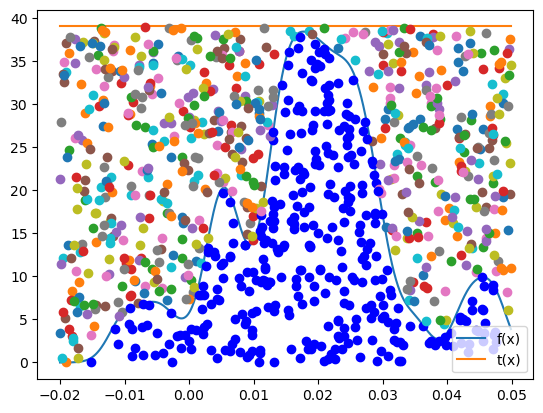

array([-2.00000000e-02, -1.99000000e-02, -1.98000000e-02, -1.97000000e-02,
       -1.96000000e-02, -1.95000000e-02, -1.94000000e-02, -1.93000000e-02,
       -1.92000000e-02, -1.91000000e-02, -1.90000000e-02, -1.89000000e-02,
       -1.88000000e-02, -1.87000000e-02, -1.86000000e-02, -1.85000000e-02,
       -1.84000000e-02, -1.83000000e-02, -1.82000000e-02, -1.81000000e-02,
       -1.80000000e-02, -1.79000000e-02, -1.78000000e-02, -1.77000000e-02,
       -1.76000000e-02, -1.75000000e-02, -1.74000000e-02, -1.73000000e-02,
       -1.72000000e-02, -1.71000000e-02, -1.70000000e-02, -1.69000000e-02,
       -1.68000000e-02, -1.67000000e-02, -1.66000000e-02, -1.65000000e-02,
       -1.64000000e-02, -1.63000000e-02, -1.62000000e-02, -1.61000000e-02,
       -1.60000000e-02, -1.59000000e-02, -1.58000000e-02, -1.57000000e-02,
       -1.56000000e-02, -1.55000000e-02, -1.54000000e-02, -1.53000000e-02,
       -1.52000000e-02, -1.51000000e-02, -1.50000000e-02, -1.49000000e-02,
       -1.48000000e-02, -

In [64]:
N = 1000
R2 = np.random.rand(N)
R1_com = np.concatenate((r, rc))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

In [65]:
acep= len(Acep_rechazo3(R2, R1, f, t))
acep_est=len(Acep_rechazo3(R2, R1_est, f, t))
acep_com= len(Acep_rechazo3(R2, R1_com, f, t))
acep, acep_est, acep_com

(352, 360, 336)

## Comprobación de distribuciones

In [32]:
import scipy.stats as st     # Librería estadística
import statsmodels.api as sm 
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [66]:
dif_inf = pd.read_excel(
    "Inflacion Mexico.xlsx",
    sheet_name="Hoja2",
    index_col=[0],
    usecols=[0, 1]
)
y= dif_inf.values
data= y.ravel()
data.shape

(96,)

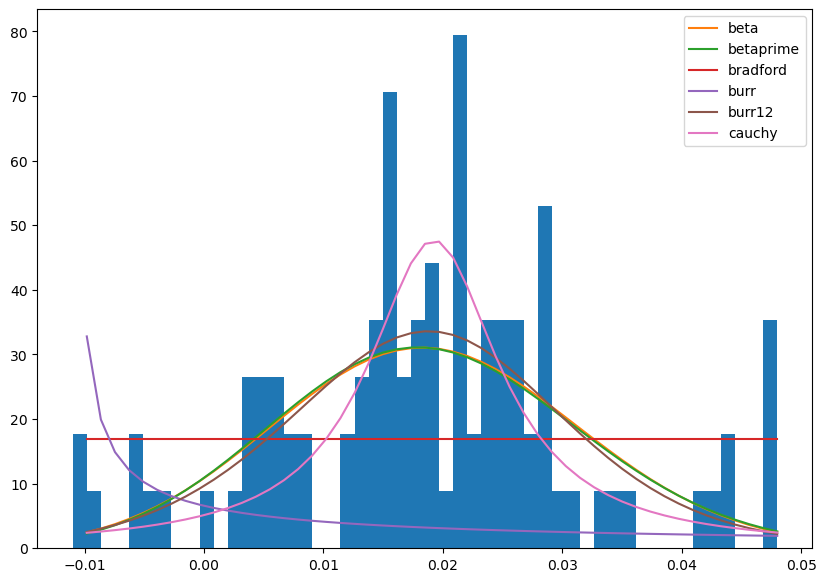

,distribución,error
0,beta,219.125609
1,betaprime,220.114907
2,bradford,323.681981
3,burr,518.850625
4,burr12,209.296502
5,cauchy,205.128739


In [67]:
#todas las distribuciones continuas
continuous_dist= [dist_i  for dist_i in dir(st) 
                  if isinstance(getattr(st,dist_i), getattr(st, 'rv_continuous'))]

fig, ax= plt.subplots(1,1, figsize=(10,7))

y,x, _= ax.hist(data, bins=50, density=True)
x= x[1:]

error_df= pd.DataFrame(columns= ['distribución', 'error'])
i= 0

#iteramos sobre todas y vemos cual se ajusta a los datos
for d in continuous_dist[4:10]:
    param= getattr(st, d).fit(data)
    y_hat= getattr(st,d).pdf(x, *param)
    error= np.mean((y-y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i += 1
    ax.plot(x, y_hat, label=f'{d}')

plt.legend()
plt.show()
error_df

In [68]:
error_df.sort_values('error')

,distribución,error
5,cauchy,205.128739
4,burr12,209.296502
0,beta,219.125609
1,betaprime,220.114907
2,bradford,323.681981
3,burr,518.850625


## Quantil- Quantil
Mejores dos con quantil-quantil

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


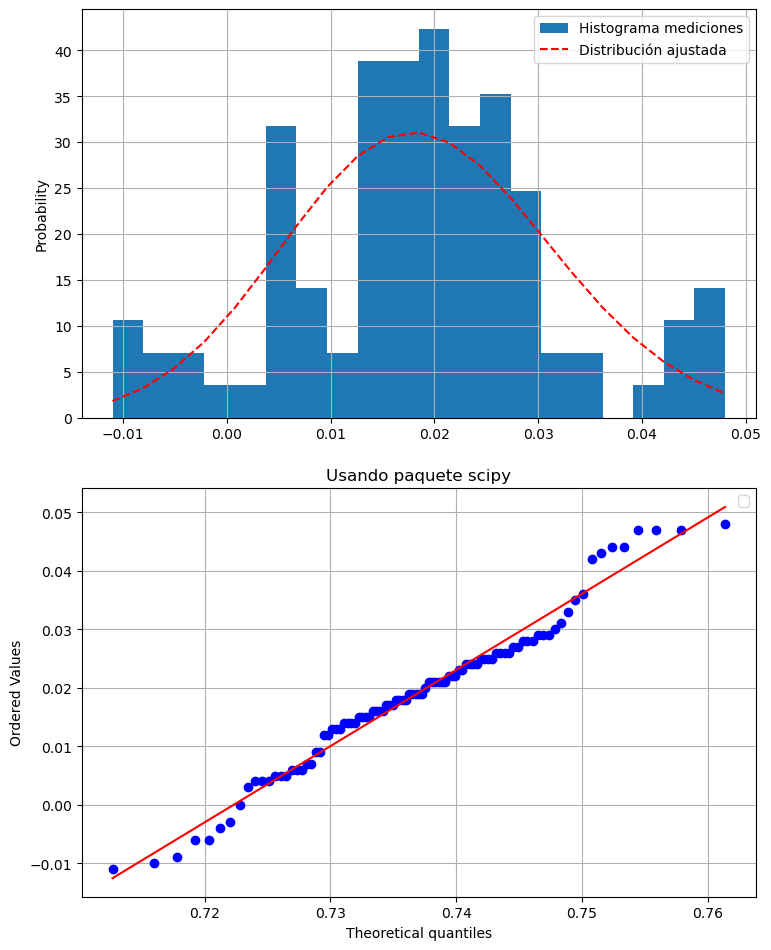

In [72]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'betaprime'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


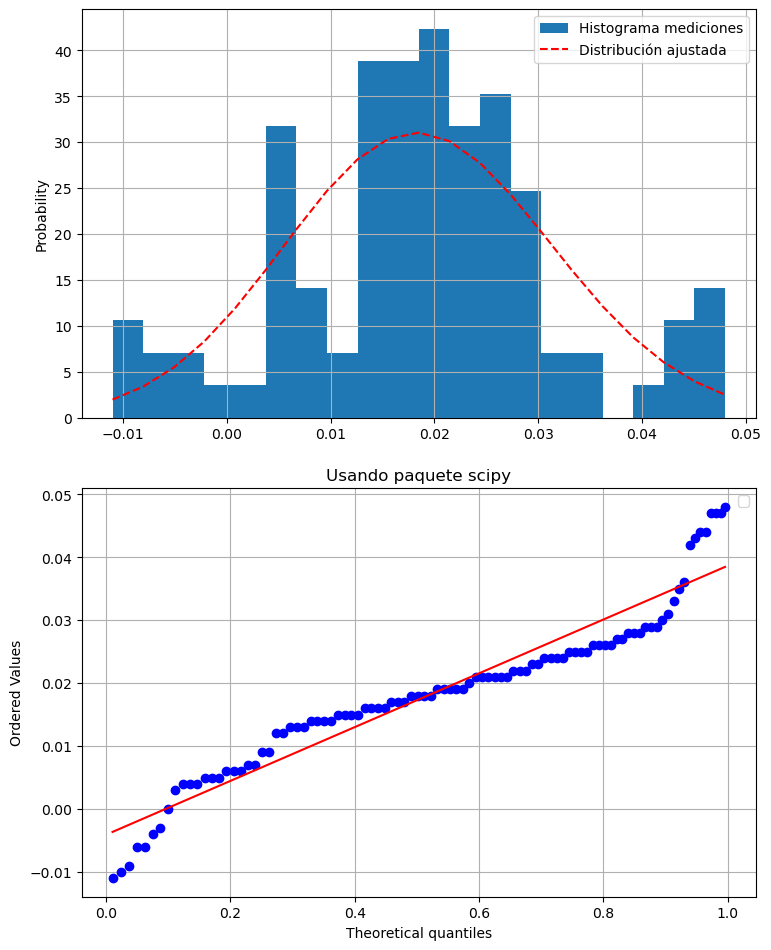

In [71]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'beta'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

# Conclusiones

En este trabajo se encontró la distribución de probabilidad del tipo de cambio Dólar Peso (USD/MXN) con el método Kernel Density Estimation, así como la distribución de probabilidad del diferencial de inflación con el mismo método. Por otra parte, se trató de aproximar alguna distribución de probabilidad existente a nuestros datos pero ninguna se ajustó a estos. 

Además obtuvimos la función de densidad de probabilidad de ambos nodos con Stats-models y una vez obtenida ésta pudimos encontrar la función de distribución acumulada para ambas distribuciones de probabilidad. Por último con nuestra PDF utilizamos el método de aceptación y rechazo para generar variables aleatorias que distribuyan como nuestras funciones.

## Referencias de obtención de datos

https://www.inegi.org.mx/app/indicesdeprecios/Estructura.aspx?idEstructura=112001300030&T=%C3%8Dndices%20de%20Precios%20al%20Consumidor&ST=Inflaci%C3%B3n%20Mensual

https://datosmacro.expansion.com/ipc-paises/usa?sector=IPC+General&sc=IPC-IG

https://mx.investing.com/currencies/usd-mxn-historical-data